In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1 = pd.read_csv("titanic_train.csv")

In [7]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df2 = df1.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis =1)

In [15]:
df2.head(3)

,Survived,Pclass,Sex,Cabin,Embarked
0,0,3,male,NaN,S
1,1,1,female,C85,C
2,1,3,female,NaN,S


In [16]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df = df1

In [22]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

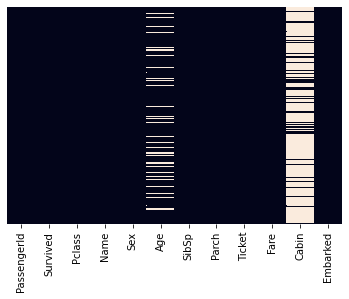

In [30]:
sns.heatmap(df1.isnull(), linecolor="blue", yticklabels=False, cbar = False, cmap= sns.color_palette("rocket", as_cmap=True))

#### the above shows the null values heat map

In [31]:
# there are plenty of null values and we need to eleminate them before using our model, we will do it later

<AxesSubplot:xlabel='Survived', ylabel='count'>

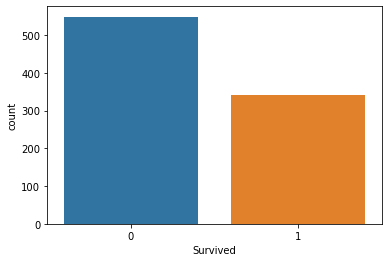

In [33]:
sns.countplot(x= 'Survived', data = df)

#### this function countplot basically gives us the histogram of the values taking x as survrived, we have obtion for 'y' also, so there may be more to it, explore it later

<AxesSubplot:xlabel='Survived', ylabel='count'>

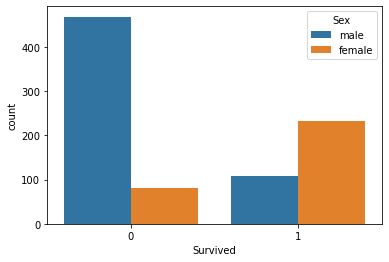

In [34]:
# differentiate the passed x with a parameter of sex

sns.countplot(x='Survived', hue='Sex', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

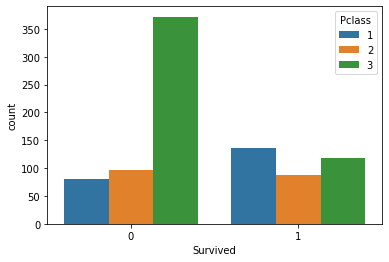

In [35]:
# divide the survrived based on which class they were travelling, the richer were more saved

sns.countplot(x='Survived', hue= 'Pclass', data= df)

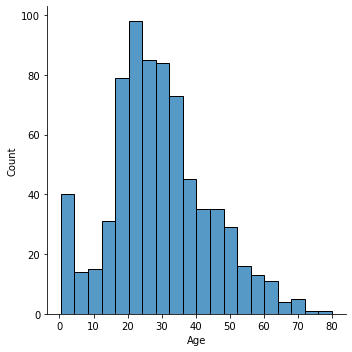

In [37]:
sns.displot(df['Age'].dropna(), kde = False)

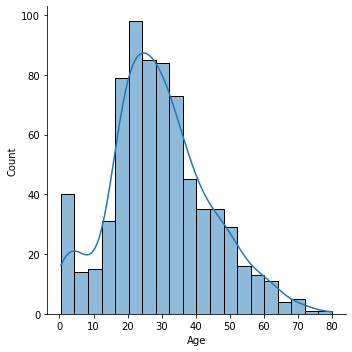

In [38]:
sns.displot(df['Age'].dropna(), kde = True,  )

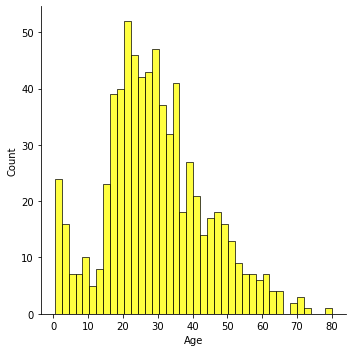

In [43]:
sns.displot(df['Age'], kde = False, color= 'yellow', bins= 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

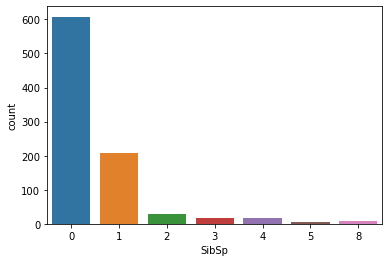

In [48]:
# let see the people with sibbling and spouse 
sns.countplot(x = df['SibSp'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

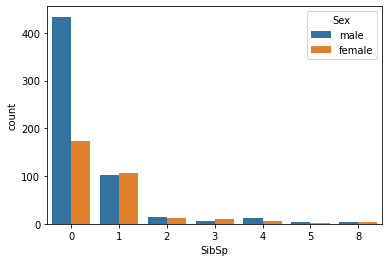

In [50]:
sns.countplot(x= df['SibSp'], hue ='Sex', data =df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

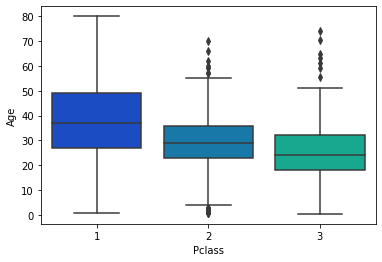

In [51]:
sns.boxplot(x='Pclass', y = 'Age', data = df, palette = 'winter')

##### now let's make some intution based on this, the age value is null in most of the places, why don't we replace the null with some valid value ?? to make sense of this valid value what we can do is looking at the above graph, we came to know that the age of those belonging to the 1st class is higher and those of the lower class is low, so let's bring an criteria to set the age to the average age of the class for those of the missing values

In [55]:
# making the null age values valid values

df[['Age', 'Pclass']].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [188]:
df = pd.read_csv('titanic_train.csv')
df = df.drop(['Ticket', 'Fare', 'Name', 'PassengerId'], axis = 1)
def input_age(cols):
    global count
    age = cols[0]
    cls = cols[1]
    if pd.isnull(age):
        if cls == 1:
            df['Age'] = 37
        elif cls == 2:
            df['Age'] = 30
        elif cls == 3:
            df['Age'] = 27
    else:
        df['Age'] = age
            
df[['Age', 'Pclass']].apply(input_age, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Length: 891, dtype: object

In [189]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,32.0,1,0,NaN,S
1,1,1,female,32.0,1,0,C85,C
2,1,3,female,32.0,0,0,NaN,S
3,1,1,female,32.0,1,0,C123,S
4,0,3,male,32.0,0,0,NaN,S


In [95]:
# by the above statement we have removed the null ages and replaced them with avarages in the perticular class

### now lets visualize it again

<AxesSubplot:>

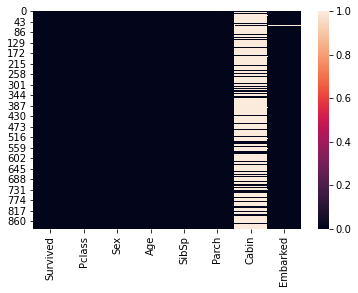

In [191]:
sns.heatmap(data=df.isnull())

In [192]:
# above we observe the graph with the null values getting disappeared

In [193]:
df = df.drop(['Cabin'], axis = 1)

In [194]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,32.0,1,0,S
1,1,1,female,32.0,1,0,C
2,1,3,female,32.0,0,0,S
3,1,1,female,32.0,1,0,S
4,0,3,male,32.0,0,0,S


In [195]:
embark = pd.get_dummies(df['Embarked'], drop_first= True)
sex = pd.get_dummies(df['Sex'], drop_first= True)

In [196]:
df = df.drop(['Embarked', 'Sex'], axis =1)
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,32.0,1,0
1,1,1,32.0,1,0
2,1,3,32.0,0,0
3,1,1,32.0,1,0
4,0,3,32.0,0,0


In [197]:
df = pd.concat([df, sex, embark], axis = 1)

### it's very important , just see that we have removed all the string values.. we cannot pass our data into different mathematical models when the data consist of strings, so initially we need to convert it number data, one of the ways i have heard about was the hot_encoder or something, here we have introduced pd.get_dummies(df['item'])

## ----------------------------------------------------------------------------------------

# Now let's see it in action, let's apply LinearRegression
#### our data has to be divided into dependent data and independent data, here dependent is "Survived" and rest all are independent

In [198]:
# training data set : 
df.drop(["Survived"], axis=1).head()

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,32.0,1,0,1,0,1
1,1,32.0,1,0,0,0,0
2,3,32.0,0,0,0,0,1
3,1,32.0,1,0,0,0,1
4,3,32.0,0,0,1,0,1


In [199]:
# output data set :
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [200]:
df

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,32.0,1,0,1,0,1
1,1,1,32.0,1,0,0,0,0
2,1,3,32.0,0,0,0,0,1
3,1,1,32.0,1,0,0,0,1
4,0,3,32.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,32.0,0,0,1,0,1
887,1,1,32.0,0,0,0,0,1
888,0,3,32.0,1,2,0,0,1
889,1,1,32.0,0,0,1,0,0


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis = 1),
                                                    df['Survived'], test_size = 0.30, random_state = 101)

## Training and Prediction

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
model1 = LogisticRegression()

In [205]:
# let's see if there are any null values in X_train
X_train.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
male      0
Q         0
S         0
dtype: int64

In [206]:
# let's see if there are any null values in y_train
y_train.isnull().sum()

0

In [208]:
# since we don't have any null values, let's pass these to our model for fitting

model1.fit(X_train, y_train)

LogisticRegression()

In [232]:
y_result_test = model1.predict(X_test)



# just checking if there is some null values
pd.DataFrame(y_result_test).isnull().sum()
pd.DataFrame(y_result_test).count()
print(len(y_result_test))
print(len(y_test))
print(len(X_test))


268
268
268


In [215]:
from sklearn.metrics import confusion_matrix

In [217]:
accuracy = confusion_matrix(y_test, y_result_test)
accuracy

array([[137,  17],
       [ 42,  72]], dtype=int64)

In [219]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_result_test)
accuracy

0.7798507462686567

so we have predicted the correct one with an accuracy of 77.9 perc, the value is different from the one in video, maybe
because i gave a different age